In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

# Знакомство с данными

## Иерархия

In [2]:
hierarchy = pd.read_csv('pr_df.csv')

In [3]:
display(hierarchy)

,pr_sku_id,pr_group_id,pr_cat_id,pr_subcat_id,pr_uom_id
0,fd064933250b0bfe4f926b867b0a5ec8,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,ca34f669ae367c87f0e75dcae0f61ee5,17
1,71c9661741caf40a92a32d1cc8206c04,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,e06f5ed77191826c212c30722f2cc5a2,17
2,00b72c2f01a1512cbb1d3f33319bac93,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,d407a3ebb4ab9b0d68b224486f8b8dad,17
3,9bc40cd2fe4f188f402bb41548c5e15c,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,ca34f669ae367c87f0e75dcae0f61ee5,17
4,3a74a370c8eb032acb11ad9119242b8f,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,e06f5ed77191826c212c30722f2cc5a2,17
...,...,...,...,...,...
2045,2c3b895d9fccc33226fee2c521618893,c74d97b01eae257e44aa9d5bade97baf,a2cc63e065705fe938a4dda49092966f,4589b8f516d28558b3850c37776cadc8,1
2046,6058d6b7d1f04803d15d1896d3256c92,6512bd43d9caa6e02c990b0a82652dca,e58cc5ca94270acaceed13bc82dfedf7,c0a667df8f0d6ee98dda972b0870fabf,1
2047,3beeab85046ca201d73bb9d129bcfc3f,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,34d2777e78ccf007523e2dd1fcea6b2d,17
2048,b9e2f33d70ffb02d6d04f470da2e45c9,aab3238922bcc25a6f606eb525ffdc56,3de2334a314a7a72721f1f74a6cb4cee,0f3abfd67959c079e7b3759440e7415c,17


In [4]:
print(hierarchy['pr_uom_id'].value_counts())

1     1279
17     771
Name: pr_uom_id, dtype: int64


In [5]:
for i in hierarchy.columns:
    print(hierarchy[i].nunique())

2050
9
43
170
2


### Деление товаров на категории

In [6]:
by_piece = hierarchy['pr_sku_id'][hierarchy['pr_uom_id']==1] 

In [7]:
print(by_piece)

36      ae0ea26efd73c891f6fe4f8af687c88f
37      ebef63de0e8fe04e0d681a25face55c9
38      e983f56659b43d6691446b013c0b9ef1
39      c4a665596d4f67cecb7542c9fad407ee
41      90702dbda20da8380fb559b1ea8c0140
                      ...               
2039    d962f4c1389fcacf76200b0fd64a3308
2044    40db0970677f1f9ba660753f0baa7d00
2045    2c3b895d9fccc33226fee2c521618893
2046    6058d6b7d1f04803d15d1896d3256c92
2049    dbfce512dcdabc6b6e2724b6ec44efda
Name: pr_sku_id, Length: 1279, dtype: object


## Продажи

In [8]:
sales = pd.read_csv('sales_df_train.csv')
display(sales)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5.0,5.0,825.0,825.0
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0,4.0,0.0,196.0,0.0
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0,1.0,0.0,78.0,0.0
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17,0,1.0,0.0,161.0,0.0
...,...,...,...,...,...,...,...,...
883010,c81e728d9d4c2f636f067f89cc14862c,a0150fefa71d6606d5e642fa0e7b8ad8,2022-12-13,1,1.0,1.0,33.0,33.0
883011,42a0e188f5033bc65bf8d78622277c4e,5b146d93f822459260216df28e572eca,2023-04-18,0,1.0,0.0,192.0,0.0
883012,42a0e188f5033bc65bf8d78622277c4e,c8bd18ea08d2f47cb0a7992f11ada9de,2022-08-16,0,5.0,0.0,970.0,0.0
883013,f7e6c85504ce6e82442c770f7c8606f0,b960c6ee5b5efa12e73f810204b561a8,2023-04-23,0,4.0,0.0,262.0,0.0


In [9]:
sales.dtypes

st_id                       object
pr_sku_id                   object
date                        object
pr_sales_type_id             int64
pr_sales_in_units          float64
pr_promo_sales_in_units    float64
pr_sales_in_rub            float64
pr_promo_sales_in_rub      float64
dtype: object

In [10]:
print(sales['date'].value_counts())

2022-12-30    3396
2022-12-29    3322
2022-12-24    3233
2022-12-28    3126
2023-06-23    3033
              ... 
2023-01-03    2083
2023-04-17    2070
2023-01-09    2041
2023-01-02    1950
2023-01-01    1182
Name: date, Length: 352, dtype: int64


### разделение товаров на поштучные и весовые

1й вариант. 

In [11]:
display(sales[sales['pr_sku_id'].isin(by_piece)])

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5.0,5.0,825.0,825.0
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17,0,1.0,0.0,161.0,0.0
6,f7e6c85504ce6e82442c770f7c8606f0,b75c7cbf7accdaea8a1a14781bb29870,2023-02-15,0,0.0,0.0,171.0,0.0
10,42a0e188f5033bc65bf8d78622277c4e,58ebafabd92e2e3a80d86b7bb7e88eda,2022-09-18,0,2.0,0.0,361.0,0.0
...,...,...,...,...,...,...,...,...
883007,1ecfb463472ec9115b10c292ef8bc986,de3d8d525e0bdfbf16812b2897c391bb,2023-05-23,1,1.0,1.0,131.0,131.0
883008,f7e6c85504ce6e82442c770f7c8606f0,0477944bbda88dbf89b8af9d645740c3,2023-03-19,0,2.0,0.0,493.0,0.0
883009,42a0e188f5033bc65bf8d78622277c4e,029905c5542302a69b170c91e96f5a14,2023-03-12,0,1.0,0.0,74.0,0.0
883011,42a0e188f5033bc65bf8d78622277c4e,5b146d93f822459260216df28e572eca,2023-04-18,0,1.0,0.0,192.0,0.0


2й вариант

In [12]:
display(sales[~sales['pr_sku_id'].isin(by_piece)])

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0,4.0,0.0,196.0,0.0
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0,1.0,0.0,78.0,0.0
5,42a0e188f5033bc65bf8d78622277c4e,3474f0e025c7deb7e127a35763bc5512,2022-11-03,0,3.0,0.0,123.0,0.0
7,1ecfb463472ec9115b10c292ef8bc986,f5c4b08ce07d102062c2947967ad750e,2023-02-05,0,2.0,0.0,65.0,0.0
8,1ecfb463472ec9115b10c292ef8bc986,c2155d600945587d417fe45ba5bf6d57,2023-05-09,0,1.0,0.0,124.0,0.0
...,...,...,...,...,...,...,...,...
882998,f7e6c85504ce6e82442c770f7c8606f0,22988026fe85fde60d8bf777ab6bc3b4,2023-06-04,1,4.0,4.0,262.0,262.0
883006,6364d3f0f495b6ab9dcf8d3b5c6e0b01,771d9ed245872c553b1472e9f43e1860,2022-11-01,1,2.0,2.0,61.0,61.0
883010,c81e728d9d4c2f636f067f89cc14862c,a0150fefa71d6606d5e642fa0e7b8ad8,2022-12-13,1,1.0,1.0,33.0,33.0
883013,f7e6c85504ce6e82442c770f7c8606f0,b960c6ee5b5efa12e73f810204b561a8,2023-04-23,0,4.0,0.0,262.0,0.0


### Отрицательные продажи - нужен комментарий! 

In [13]:
display(sales[(sales['pr_sales_in_rub']<0) | (sales['pr_promo_sales_in_rub']<0)])

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
7919,6364d3f0f495b6ab9dcf8d3b5c6e0b01,13928e132e7e0e55a0a8a6f0fd539758,2022-09-29,0,-1.0,0.0,-763.0,0.0
11635,fa7cdfad1a5aaf8370ebeda47a1ff1c3,b66f2459d3013603d5c924ee370093c8,2023-06-12,1,-2.0,-2.0,-344.0,-344.0
21385,fa7cdfad1a5aaf8370ebeda47a1ff1c3,9aa7008fa27151bf77be5f4c9d023d5f,2023-04-06,0,-2.0,0.0,-48.0,0.0
30000,6364d3f0f495b6ab9dcf8d3b5c6e0b01,364196813f3b746270a9b27bd76149c9,2023-04-21,0,-1.0,0.0,-182.0,0.0
43146,f7e6c85504ce6e82442c770f7c8606f0,699dc7822b719137e8124b728ab45fa3,2022-11-10,1,-0.0,-0.0,-32.0,-32.0
...,...,...,...,...,...,...,...,...
815057,1ecfb463472ec9115b10c292ef8bc986,c82dccf4ccf7017ba622a86f5dcbc736,2022-12-19,1,-3.0,-3.0,-454.0,-454.0
849426,c81e728d9d4c2f636f067f89cc14862c,4ce0eb956648ab3ff6bb0afa3158cc42,2023-01-31,0,-0.0,0.0,-51.0,0.0
856454,42a0e188f5033bc65bf8d78622277c4e,5ca106c323e777ec8b42dbbab099932c,2022-10-21,0,-8.0,0.0,-409.0,0.0
866176,16a5cdae362b8d27a1d8f8c7b78b4330,b067862254b74824193087f2a16c0c79,2023-05-26,1,-4.0,-4.0,-2430.0,-2430.0


### Суммы из воздуха

In [14]:
filtered_sales = sales[(sales['pr_sales_in_units'] == 0) & (sales['pr_promo_sales_in_units'] == 0)]
display(filtered_sales)


,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0
6,f7e6c85504ce6e82442c770f7c8606f0,b75c7cbf7accdaea8a1a14781bb29870,2023-02-15,0,0.0,0.0,171.0,0.0
27,42a0e188f5033bc65bf8d78622277c4e,cfb54b1ce12bb3f9b6b9e2ea0b57414b,2022-11-10,0,0.0,0.0,91.0,0.0
28,f7e6c85504ce6e82442c770f7c8606f0,88d7313785c97631bf3df61e70636491,2022-11-30,0,0.0,0.0,79.0,0.0
32,fa7cdfad1a5aaf8370ebeda47a1ff1c3,b610088ddf586449793d3c6da70d4c56,2023-02-26,0,0.0,0.0,83.0,0.0
...,...,...,...,...,...,...,...,...
882978,fa7cdfad1a5aaf8370ebeda47a1ff1c3,a1f93a1aeb02759147d69276c70217db,2023-06-07,1,0.0,0.0,30.0,30.0
882979,6364d3f0f495b6ab9dcf8d3b5c6e0b01,cda72490a16c471e7a192a956f476e95,2023-04-11,0,0.0,0.0,62.0,0.0
882991,16a5cdae362b8d27a1d8f8c7b78b4330,7d945116ed12c2807d081df6f666ba37,2023-07-01,1,0.0,0.0,70.0,70.0
883004,42a0e188f5033bc65bf8d78622277c4e,143f62003066d8d4cc33d3e9161d114d,2022-12-25,1,0.0,0.0,41.0,41.0


In [15]:
filtered_sales2 = sales[(sales['pr_sales_in_rub'] == 0) & (sales['pr_promo_sales_in_rub'] == 0)]
display(filtered_sales2)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
30,f7e6c85504ce6e82442c770f7c8606f0,3474f0e025c7deb7e127a35763bc5512,2023-06-06,1,8.0,8.0,0.0,0.0
1221,f7e6c85504ce6e82442c770f7c8606f0,67dcedaa1090d67cef7afe3fb36945b0,2022-12-19,1,0.0,0.0,0.0,0.0
3845,fa7cdfad1a5aaf8370ebeda47a1ff1c3,5b146d93f822459260216df28e572eca,2023-04-04,1,0.0,0.0,0.0,0.0
6313,53e19f3dbb211f20b20b45668303c1b6,ee21c04f96ab30a8b3ca761e57e016ca,2022-11-09,1,1.0,1.0,0.0,0.0
6454,f7e6c85504ce6e82442c770f7c8606f0,d4e879aca51d48e0feba3112f0d1b8cd,2023-02-28,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
879518,6364d3f0f495b6ab9dcf8d3b5c6e0b01,8cad09283d1d6c5fb08daec8a576a72d,2022-10-20,1,0.0,0.0,0.0,0.0
881250,6364d3f0f495b6ab9dcf8d3b5c6e0b01,35071e7911b66b2f42bffca06f939598,2023-01-10,1,0.0,0.0,0.0,0.0
882360,6364d3f0f495b6ab9dcf8d3b5c6e0b01,2dc922d957188fb51dd2bd50ec9b555a,2022-10-29,1,12.0,12.0,0.0,0.0
882380,f7e6c85504ce6e82442c770f7c8606f0,9da31b9d3cf407cd724c65b7dfed00ee,2022-11-27,1,3.0,3.0,0.0,0.0


Оказывается, из воздуха есть не только суммы, но и количества. 

## Образец подаваемых данных

In [16]:
example = pd.read_csv('sales_submission.csv')
display(example)

,st_id,pr_sku_id,date,target
0,16a5cdae362b8d27a1d8f8c7b78b4330,0045ebdb1069ff4b3dd3efe628c39cd3,2023-07-20,0
1,16a5cdae362b8d27a1d8f8c7b78b4330,00661699f543753ec7e911a64b9fd2f6,2023-07-20,0
2,16a5cdae362b8d27a1d8f8c7b78b4330,0094042bfeae507dc7f62acc8e5ed03a,2023-07-20,0
3,16a5cdae362b8d27a1d8f8c7b78b4330,0169529ff660adcac9b7e354e0c4b882,2023-07-20,0
4,16a5cdae362b8d27a1d8f8c7b78b4330,01e4734745e97e52d3213449e1a05dd7,2023-07-20,0
...,...,...,...,...
43689,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fd519eb13005448a303df1089505a42b,2023-08-01,0
43690,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fdb89dfd1a27256904eb5a5734252102,2023-08-01,0
43691,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fe50ae64d08d4f8245aaabc55d1baf79,2023-08-01,0
43692,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fe5d18ae6650335830e4c1dbd9e6ddb9,2023-08-01,0


## Магазины

In [17]:
store = pd.read_csv('st_df.csv')
display(store)

,st_id,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
0,1aa057313c28fa4a40c5bc084b11d276,1587965fb4d4b5afe8428a4a024feb0d,81b4dd343f5880df806d4c5d4a846c64,4,3,19,0
1,bd470ca955d9497bbcb808e59952fffc,955d864a62659945cc9434898e275deb,e26072c92d8fe0738df44d571d5f5e8b,4,3,19,1
2,6364d3f0f495b6ab9dcf8d3b5c6e0b01,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1,1,12,1
3,1ecfb463472ec9115b10c292ef8bc986,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,2,1,28,1
4,16a5cdae362b8d27a1d8f8c7b78b4330,c1f75cc0f7fe269dd0fd9bd5e24f9586,296bd0cc6e735f9d7488ebc8fbc19130,1,2,8,1
5,53e19f3dbb211f20b20b45668303c1b6,955d864a62659945cc9434898e275deb,e26072c92d8fe0738df44d571d5f5e8b,4,3,20,1
6,42a0e188f5033bc65bf8d78622277c4e,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1,1,12,1
7,c81e728d9d4c2f636f067f89cc14862c,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,1,1,8,1
8,fa7cdfad1a5aaf8370ebeda47a1ff1c3,885fe656777008c335ac96072a45be15,296bd0cc6e735f9d7488ebc8fbc19130,1,1,12,1
9,f7e6c85504ce6e82442c770f7c8606f0,3202111cf90e7c816a472aaceb72b0df,32586311f16876abf92901085bd87b99,1,1,12,1


# Первые дропы

## Магазины

Удаляем данные о продажах в неработающих магазинах

In [18]:
stores_to_drop = store['st_id'][store['st_is_active']==0]
print(stores_to_drop)

0     1aa057313c28fa4a40c5bc084b11d276
10    62f91ce9b820a491ee78c108636db089
Name: st_id, dtype: object


In [19]:
sales = sales[~sales['st_id'].isin(stores_to_drop)]
display(sales)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5.0,5.0,825.0,825.0
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0,4.0,0.0,196.0,0.0
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0,1.0,0.0,78.0,0.0
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17,0,1.0,0.0,161.0,0.0
...,...,...,...,...,...,...,...,...
883010,c81e728d9d4c2f636f067f89cc14862c,a0150fefa71d6606d5e642fa0e7b8ad8,2022-12-13,1,1.0,1.0,33.0,33.0
883011,42a0e188f5033bc65bf8d78622277c4e,5b146d93f822459260216df28e572eca,2023-04-18,0,1.0,0.0,192.0,0.0
883012,42a0e188f5033bc65bf8d78622277c4e,c8bd18ea08d2f47cb0a7992f11ada9de,2022-08-16,0,5.0,0.0,970.0,0.0
883013,f7e6c85504ce6e82442c770f7c8606f0,b960c6ee5b5efa12e73f810204b561a8,2023-04-23,0,4.0,0.0,262.0,0.0


In [20]:
print(sales['st_id'].value_counts())

c81e728d9d4c2f636f067f89cc14862c    174687
16a5cdae362b8d27a1d8f8c7b78b4330    157542
42a0e188f5033bc65bf8d78622277c4e    140286
f7e6c85504ce6e82442c770f7c8606f0    124145
6364d3f0f495b6ab9dcf8d3b5c6e0b01    115830
fa7cdfad1a5aaf8370ebeda47a1ff1c3    110537
1ecfb463472ec9115b10c292ef8bc986     47404
53e19f3dbb211f20b20b45668303c1b6      9231
bd470ca955d9497bbcb808e59952fffc      2586
084a8a9aa8cced9175bd07bc44998e75        38
Name: st_id, dtype: int64


Меньше 1000 значений отвалилось. То есть мало данных были из неактивных магазинов. Хорошо, что на этом мало данных теряем. 

Я бы за одно дропнул данные с последнего, а то и 2 магазинов. 38 продаж ничего нам не дадут, но и 2586 продаж тоже ерунда, особенно если размазаны на много товаров. Придется проверять. 

In [21]:
display(sales[sales['st_id']=='bd470ca955d9497bbcb808e59952fffc']['pr_sku_id'].value_counts().head(30))

861f516882af16ff45234407eda09606    270
ee21c04f96ab30a8b3ca761e57e016ca    198
de96549fe7e95032ca74cf83e70eded2    195
c82dccf4ccf7017ba622a86f5dcbc736    141
abbcffeaf2c914f4e61d119f7b95cf35    138
21c11f1628b35916baddf033b748940c    123
025967a3c53711dc29a78cbecc908ecd    119
5f420eb30e2c5353be58952c969965fd    106
b26ff8347bfe16de1873590500ce1df8     94
c094d01a05c16145a507b8a2b840a4f0     94
e4d5fdbba51406e917f26f3522c513be     88
033013f94a18c066e8b3d610bed34bee     81
9bf41ccdcb3d361472efb9284962df17     79
4eb42cea3a5dc6b89f5e608a9d8d9cf0     68
f32fd3acc6b050e411d97e4235b12102     50
cb822ecde73d4362a6dccf0595a83cbd     49
8cc3c766285e320aef48183a4bbe22d1     47
4695acecbef4734453cf9bc0be67ffe4     47
b8c6ab77596800a8789ae53ab6173e34     37
48e0c6769ad81d409a06471678920e2b     35
4888d22310be911500c00611a9dd44eb     29
7b6ba6ad2c09b8b003c63012d476359e     28
b07cc226d71885e00736dc1adfc8d701     25
711a1dcfd5b73a780173613120828ac0     24
0f152427918d29bb1081834c1d375a48     21


Да, это размазано на 85 товаров и и них более-менне постоянный спрос всего на 20 товаров. 

я заметил, что 2 неактивных магазина и 3 магазина с наименьшим количеством продаж имеют статус 4. Может, их тоже дропнуть все во имя кластеризации? Предварительно просмотрим 3й с конца магазин...

In [22]:
display(sales[sales['st_id']=='53e19f3dbb211f20b20b45668303c1b6']['pr_sku_id'].value_counts().head(30))

c82dccf4ccf7017ba622a86f5dcbc736    521
21c11f1628b35916baddf033b748940c    494
861f516882af16ff45234407eda09606    468
ee21c04f96ab30a8b3ca761e57e016ca    418
b26ff8347bfe16de1873590500ce1df8    357
abbcffeaf2c914f4e61d119f7b95cf35    252
de96549fe7e95032ca74cf83e70eded2    246
c094d01a05c16145a507b8a2b840a4f0    242
025967a3c53711dc29a78cbecc908ecd    239
5f420eb30e2c5353be58952c969965fd    208
f32fd3acc6b050e411d97e4235b12102    197
e4d5fdbba51406e917f26f3522c513be    195
7573524fe31ce7272681364786e1e788    195
50facd9b2f8f883f238423203a7d96eb    195
4eb42cea3a5dc6b89f5e608a9d8d9cf0    192
3a74a370c8eb032acb11ad9119242b8f    181
cb822ecde73d4362a6dccf0595a83cbd    173
4eb9329e7705bc85d1fcb8d7414a769b    168
8cc3c766285e320aef48183a4bbe22d1    162
a5e8edb75910efadcc160dd2d862d044    155
8c94f94fc55436b69c5be2347d84547e    150
695078b902484f8edb56d01c0b906c8c    149
9a2e4d955369969614b3f5074db133a6    149
4695acecbef4734453cf9bc0be67ffe4    136
a7a9eb3ffb9634e37c50995c34da34d0    132


In [23]:
ware_1 = sales[(sales['st_id'] == '53e19f3dbb211f20b20b45668303c1b6') 
              & (sales['pr_sku_id'] == 'c82dccf4ccf7017ba622a86f5dcbc736')]
display(ware_1)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
873,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-04-05,0,0.0,0.0,59.0,0.0
4228,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-07-15,0,1.0,0.0,207.0,0.0
4257,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-02-11,0,0.0,0.0,93.0,0.0
4301,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-05-17,0,1.0,0.0,209.0,0.0
5865,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-05-14,0,2.0,0.0,321.0,0.0
...,...,...,...,...,...,...,...,...
870113,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2022-10-20,0,1.0,0.0,91.0,0.0
873571,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-01-28,0,0.0,0.0,39.0,0.0
875819,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-03-09,0,2.0,0.0,313.0,0.0
877220,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2022-12-10,0,0.0,0.0,49.0,0.0


In [24]:
display(ware_1['date'].value_counts())

2023-04-05    2
2022-10-18    2
2023-06-25    2
2023-03-28    2
2022-10-31    2
             ..
2022-08-18    1
2022-10-02    1
2023-02-25    1
2023-06-03    1
2022-09-10    1
Name: date, Length: 311, dtype: int64

In [25]:
display(ware_1[ware_1['date'] == '2023-04-05'])

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
873,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-04-05,0,0.0,0.0,59.0,0.0
352751,53e19f3dbb211f20b20b45668303c1b6,c82dccf4ccf7017ba622a86f5dcbc736,2023-04-05,1,1.0,1.0,129.0,129.0


Оказывается, что есть дублирующиеся записи. Полностью совпадает id магазина, товара и дата. Но в одной части нет продаж в единицах. 

интересно, это развесной товар или штучный? 

In [26]:
display(hierarchy[hierarchy['pr_sku_id']=='c82dccf4ccf7017ba622a86f5dcbc736'])

,pr_sku_id,pr_group_id,pr_cat_id,pr_subcat_id,pr_uom_id
319,c82dccf4ccf7017ba622a86f5dcbc736,aab3238922bcc25a6f606eb525ffdc56,186a157b2992e7daed3677ce8e9fe40f,aa36dc1d45661519a5bf923429776a83,1


Хотя что это мне дает, если я не знаю, какой ключт отвечает за развесное, а какой за штучное. А еще интересно, как изменится количество продаваемых в мелких магазинах товаров после того как мы удалим данные, где нет продаж в штуках. 

## Нет продаж в штуках и отрицательные продажи. 

Отрицательных продаж много, но они испортят нам как прогноз, так и корреляцию. Их мы без зазрения совести удалим. Что касается данных с нулями в продажах по штукам - было пояснение их тоже удалять.

In [27]:
sales.shape

(882286, 8)

In [28]:
display(sales)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5.0,5.0,825.0,825.0
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0,4.0,0.0,196.0,0.0
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0,1.0,0.0,78.0,0.0
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17,0,1.0,0.0,161.0,0.0
...,...,...,...,...,...,...,...,...
883010,c81e728d9d4c2f636f067f89cc14862c,a0150fefa71d6606d5e642fa0e7b8ad8,2022-12-13,1,1.0,1.0,33.0,33.0
883011,42a0e188f5033bc65bf8d78622277c4e,5b146d93f822459260216df28e572eca,2023-04-18,0,1.0,0.0,192.0,0.0
883012,42a0e188f5033bc65bf8d78622277c4e,c8bd18ea08d2f47cb0a7992f11ada9de,2022-08-16,0,5.0,0.0,970.0,0.0
883013,f7e6c85504ce6e82442c770f7c8606f0,b960c6ee5b5efa12e73f810204b561a8,2023-04-23,0,4.0,0.0,262.0,0.0


In [29]:
#sales = sales.drop(sales[(sales['pr_sales_in_rub'] < 0) | (sales['pr_promo_sales_in_rub'] < 0)], axis=0)
# я хз, но почему-то каод косячит... 
sales = sales[(sales['pr_sales_in_rub'] >= 0) & (sales['pr_promo_sales_in_rub'] >= 0)]
sales.shape

(882208, 8)

In [30]:
filtered_sales = sales[(sales['pr_sales_in_units'] == 0) & (sales['pr_promo_sales_in_units'] == 0)]
display(filtered_sales)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0
6,f7e6c85504ce6e82442c770f7c8606f0,b75c7cbf7accdaea8a1a14781bb29870,2023-02-15,0,0.0,0.0,171.0,0.0
27,42a0e188f5033bc65bf8d78622277c4e,cfb54b1ce12bb3f9b6b9e2ea0b57414b,2022-11-10,0,0.0,0.0,91.0,0.0
28,f7e6c85504ce6e82442c770f7c8606f0,88d7313785c97631bf3df61e70636491,2022-11-30,0,0.0,0.0,79.0,0.0
32,fa7cdfad1a5aaf8370ebeda47a1ff1c3,b610088ddf586449793d3c6da70d4c56,2023-02-26,0,0.0,0.0,83.0,0.0
...,...,...,...,...,...,...,...,...
882978,fa7cdfad1a5aaf8370ebeda47a1ff1c3,a1f93a1aeb02759147d69276c70217db,2023-06-07,1,0.0,0.0,30.0,30.0
882979,6364d3f0f495b6ab9dcf8d3b5c6e0b01,cda72490a16c471e7a192a956f476e95,2023-04-11,0,0.0,0.0,62.0,0.0
882991,16a5cdae362b8d27a1d8f8c7b78b4330,7d945116ed12c2807d081df6f666ba37,2023-07-01,1,0.0,0.0,70.0,70.0
883004,42a0e188f5033bc65bf8d78622277c4e,143f62003066d8d4cc33d3e9161d114d,2022-12-25,1,0.0,0.0,41.0,41.0


In [31]:
sales = sales[~((sales['pr_sales_in_units'] == 0) & (sales['pr_promo_sales_in_units'] == 0))]
sales.shape

(815674, 8)

In [32]:
sales = sales[~((sales['pr_sales_in_rub'] == 0) & (sales['pr_promo_sales_in_rub'] == 0))]
sales.shape

(814881, 8)

Тут, наверное, пока все. По крайней мере, все с очевидными косяками в данных. После исследования, возможно, придется еще издабляться от непредсказываемых или плохопредсказываемых товаров. Возможно, еще выбросы какие-то можно посмотрет.

### еще отрицательные продажи

In [33]:
display(sales[(sales['pr_sales_in_units'] < 0) | (sales['pr_promo_sales_in_units'] < 0)])

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub


In [34]:
sales = sales[(sales['pr_sales_in_units'] >= 0) & (sales['pr_promo_sales_in_units'] >= 0)]
sales.shape

(814881, 8)

# Второй этап исследования данных

## Магазины

In [35]:
store_sales_agg = sales['st_id'].value_counts()
print(store_sales_agg)

c81e728d9d4c2f636f067f89cc14862c    164681
16a5cdae362b8d27a1d8f8c7b78b4330    143898
42a0e188f5033bc65bf8d78622277c4e    128487
f7e6c85504ce6e82442c770f7c8606f0    114161
6364d3f0f495b6ab9dcf8d3b5c6e0b01    105266
fa7cdfad1a5aaf8370ebeda47a1ff1c3    100699
1ecfb463472ec9115b10c292ef8bc986     46160
53e19f3dbb211f20b20b45668303c1b6      9002
bd470ca955d9497bbcb808e59952fffc      2489
084a8a9aa8cced9175bd07bc44998e75        38
Name: st_id, dtype: int64


In [36]:
#store2 = store.merge(store_sales_agg, on='st_id', how='left')

После дропов количество продаж из магазинов категории 4 не сильно уменьшилось, хоть и уменьшилось. 

In [37]:
store['sales_total'] = store['st_id'].map(store_sales_agg)

display(store.sort_values(by='sales_total', ascending = False))


,st_id,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active,sales_total
7,c81e728d9d4c2f636f067f89cc14862c,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,1,1,8,1,164681.0
4,16a5cdae362b8d27a1d8f8c7b78b4330,c1f75cc0f7fe269dd0fd9bd5e24f9586,296bd0cc6e735f9d7488ebc8fbc19130,1,2,8,1,143898.0
6,42a0e188f5033bc65bf8d78622277c4e,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1,1,12,1,128487.0
9,f7e6c85504ce6e82442c770f7c8606f0,3202111cf90e7c816a472aaceb72b0df,32586311f16876abf92901085bd87b99,1,1,12,1,114161.0
2,6364d3f0f495b6ab9dcf8d3b5c6e0b01,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1,1,12,1,105266.0
8,fa7cdfad1a5aaf8370ebeda47a1ff1c3,885fe656777008c335ac96072a45be15,296bd0cc6e735f9d7488ebc8fbc19130,1,1,12,1,100699.0
3,1ecfb463472ec9115b10c292ef8bc986,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,2,1,28,1,46160.0
5,53e19f3dbb211f20b20b45668303c1b6,955d864a62659945cc9434898e275deb,e26072c92d8fe0738df44d571d5f5e8b,4,3,20,1,9002.0
1,bd470ca955d9497bbcb808e59952fffc,955d864a62659945cc9434898e275deb,e26072c92d8fe0738df44d571d5f5e8b,4,3,19,1,2489.0
11,084a8a9aa8cced9175bd07bc44998e75,3202111cf90e7c816a472aaceb72b0df,32586311f16876abf92901085bd87b99,4,3,19,1,38.0


In [38]:
small_stores = ['62f91ce9b820a491ee78c108636db089',
                '1aa057313c28fa4a40c5bc084b11d276', '084a8a9aa8cced9175bd07bc44998e75',
               'bd470ca955d9497bbcb808e59952fffc', '53e19f3dbb211f20b20b45668303c1b6']

Очень интересное открытие: все магазинчики с маленькими продажами, которые я хочу удалить, принадлежат к одной и той же категори, типу локации и половина из них неактивны. Это еще больше усиливает мое желание их удалить. 

Единственный магазин из нижней категории сейчас будет бороться за жизнь в нашем проекте. Попробуем еще раз оценить , насколько эффективно мы там можем что-то предсказать:

In [39]:
display(sales[sales['st_id']=='bd470ca955d9497bbcb808e59952fffc'])

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
370,bd470ca955d9497bbcb808e59952fffc,b26ff8347bfe16de1873590500ce1df8,2022-10-03,1,4.0,4.0,91.0,91.0
404,bd470ca955d9497bbcb808e59952fffc,8cc3c766285e320aef48183a4bbe22d1,2023-05-19,0,2.0,0.0,82.0,0.0
463,bd470ca955d9497bbcb808e59952fffc,c82dccf4ccf7017ba622a86f5dcbc736,2022-08-24,0,1.0,0.0,215.0,0.0
648,bd470ca955d9497bbcb808e59952fffc,ee21c04f96ab30a8b3ca761e57e016ca,2022-10-18,0,2.0,0.0,65.0,0.0
2295,bd470ca955d9497bbcb808e59952fffc,5f420eb30e2c5353be58952c969965fd,2022-08-26,1,1.0,1.0,20.0,20.0
...,...,...,...,...,...,...,...,...
881048,bd470ca955d9497bbcb808e59952fffc,ee21c04f96ab30a8b3ca761e57e016ca,2022-08-03,1,4.0,4.0,147.0,147.0
881293,bd470ca955d9497bbcb808e59952fffc,b26ff8347bfe16de1873590500ce1df8,2022-11-13,0,2.0,0.0,49.0,0.0
881344,bd470ca955d9497bbcb808e59952fffc,abbcffeaf2c914f4e61d119f7b95cf35,2022-10-29,1,3.0,3.0,61.0,61.0
882206,bd470ca955d9497bbcb808e59952fffc,de96549fe7e95032ca74cf83e70eded2,2022-11-21,1,4.0,4.0,147.0,147.0


In [40]:
display(sales[sales['st_id']=='53e19f3dbb211f20b20b45668303c1b6']['pr_sku_id'].value_counts())

861f516882af16ff45234407eda09606    468
c82dccf4ccf7017ba622a86f5dcbc736    420
ee21c04f96ab30a8b3ca761e57e016ca    413
21c11f1628b35916baddf033b748940c    395
b26ff8347bfe16de1873590500ce1df8    354
                                   ... 
5c70177d1170a79b9ff82d4459027c44      1
445f1b38aae4d4c9b2cb2252611d19b3      1
7e4631ef11be29330a5f42e48ff12213      1
65b549322da3ee58ae90de15c61b62ae      1
d2c189b756325c66e9e0568ba45a9dd3      1
Name: pr_sku_id, Length: 111, dtype: int64

У нас всего 352 разных даты. То есть у нас тут все еще оcтались дубликаты. 

С другой стороны зачем сейчас бездумно это удалаять? Может, сделаем несколько маленьких моделей, отдельно для этого магазина. Тут всего 11 товаров, из них еще минимум половина отвалится, а остальное как-нибудь кластеризуем...? 

### Давайте магазины все-таки дропнем. 

In [41]:
sales.shape

(814881, 8)

In [42]:
small_store_sales = sales[sales['st_id'].isin(small_stores)]

In [43]:
display(small_store_sales)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
137,53e19f3dbb211f20b20b45668303c1b6,9a2e4d955369969614b3f5074db133a6,2022-11-10,0,2.0,0.0,82.0,0.0
224,53e19f3dbb211f20b20b45668303c1b6,c7e043e0f743476582f79ba27ba3c51f,2023-07-09,0,3.0,0.0,49.0,0.0
370,bd470ca955d9497bbcb808e59952fffc,b26ff8347bfe16de1873590500ce1df8,2022-10-03,1,4.0,4.0,91.0,91.0
404,bd470ca955d9497bbcb808e59952fffc,8cc3c766285e320aef48183a4bbe22d1,2023-05-19,0,2.0,0.0,82.0,0.0
427,53e19f3dbb211f20b20b45668303c1b6,8cc3c766285e320aef48183a4bbe22d1,2023-04-12,0,3.0,0.0,122.0,0.0
...,...,...,...,...,...,...,...,...
882655,53e19f3dbb211f20b20b45668303c1b6,861f516882af16ff45234407eda09606,2022-09-25,1,2.0,2.0,59.0,59.0
882738,bd470ca955d9497bbcb808e59952fffc,a5e8edb75910efadcc160dd2d862d044,2023-04-15,0,1.0,0.0,41.0,0.0
882850,53e19f3dbb211f20b20b45668303c1b6,e4d5fdbba51406e917f26f3522c513be,2023-02-14,0,2.0,0.0,49.0,0.0
882875,53e19f3dbb211f20b20b45668303c1b6,de96549fe7e95032ca74cf83e70eded2,2022-12-11,0,2.0,0.0,82.0,0.0


In [44]:
sales = sales[~sales['st_id'].isin(small_stores)]
sales.shape

(803352, 8)

## Корректирование продаж по акции и без

Для того, чтобы смотреть какие-то агрегаты, надо исправить еще один косяк. У нас в даннных есть товары, у которых продажи стоят и в промо и без промо. Это оштбка нам надо ее исправить, потому что в 1 денеь товар продавался либо только по акции либо только без. 

In [45]:
data_to_correct = sales[(sales['pr_sales_in_rub']==sales['pr_promo_sales_in_rub']) & (sales['pr_sales_in_rub']!=0)]
display(data_to_correct)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5.0,5.0,825.0,825.0
12,42a0e188f5033bc65bf8d78622277c4e,282984b385d80166ba0d4f32a7843f53,2022-11-30,1,4.0,4.0,398.0,398.0
13,c81e728d9d4c2f636f067f89cc14862c,930569d31168ec975f903e5dc06e8deb,2023-06-19,1,1.0,1.0,35.0,35.0
16,1ecfb463472ec9115b10c292ef8bc986,8b5beb776da3223faf1f066d5772dc2b,2023-01-02,1,1.0,1.0,199.0,199.0
22,42a0e188f5033bc65bf8d78622277c4e,1d2448c22721c94bb0264cf52598522f,2023-07-01,1,4.0,4.0,31.0,31.0
...,...,...,...,...,...,...,...,...
882994,f7e6c85504ce6e82442c770f7c8606f0,447f4f6e309a60e30e544daf13e0a1cb,2022-08-27,1,1.0,1.0,16.0,16.0
882998,f7e6c85504ce6e82442c770f7c8606f0,22988026fe85fde60d8bf777ab6bc3b4,2023-06-04,1,4.0,4.0,262.0,262.0
883006,6364d3f0f495b6ab9dcf8d3b5c6e0b01,771d9ed245872c553b1472e9f43e1860,2022-11-01,1,2.0,2.0,61.0,61.0
883007,1ecfb463472ec9115b10c292ef8bc986,de3d8d525e0bdfbf16812b2897c391bb,2023-05-23,1,1.0,1.0,131.0,131.0


In [46]:
display(data_to_correct['pr_sales_type_id'].value_counts())

1    320189
Name: pr_sales_type_id, dtype: int64

Превосходно!!!! Это все товары по акции, но почему-то они дублируются еще в продажи без акций. Ничего страшного, мы уьерем у них продажи без акций как в штуках, так и в рублях. А потом добавим 3 колонки: 1) тотал продажи в рублях, тотал продажи в штуках и цена. 

In [47]:
#for i in range(len(sales)):
#    if (sales[i]['pr_sales_in_rub']==sales[i]['pr_promo_sales_in_rub']) & (sales[i]['pr_sales_in_rub']!=0):
#        sales[i]['pr_sales_in_rub'] = 0
#        sales[i]['pr_sales_in_units'] = 0       

In [48]:
mask = (sales['pr_sales_in_rub'] == sales['pr_promo_sales_in_rub']) & (sales['pr_sales_in_rub'] != 0)

sales.loc[mask, 'pr_sales_in_rub'] = 0
sales.loc[mask, 'pr_sales_in_units'] = 0

In [49]:
data_to_correct = sales[(sales['pr_sales_in_rub']==sales['pr_promo_sales_in_rub']) & (sales['pr_sales_in_rub']!=0)]
display(data_to_correct)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub


In [50]:
print(sales['pr_sales_type_id'].value_counts())

0    483163
1    320189
Name: pr_sales_type_id, dtype: int64


Лол, почти все документы акционные товары были так исковерканы... Но теперь мы уже с этим разорались, так что нестрашно.

In [51]:
sales['total_quantity'] = sales['pr_sales_in_units'] + sales['pr_promo_sales_in_units']

In [52]:
sales['total_sum'] = sales['pr_sales_in_rub'] + sales['pr_promo_sales_in_rub']

In [53]:
sales['price'] = sales['total_sum'] / sales['total_quantity']

In [54]:
display(sales)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub,total_quantity,total_sum,price
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,0.0,5.0,0.0,825.0,5.0,825.0,165.00
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0,4.0,0.0,196.0,0.0,4.0,196.0,49.00
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0,1.0,0.0,78.0,0.0,1.0,78.0,78.00
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17,0,1.0,0.0,161.0,0.0,1.0,161.0,161.00
5,42a0e188f5033bc65bf8d78622277c4e,3474f0e025c7deb7e127a35763bc5512,2022-11-03,0,3.0,0.0,123.0,0.0,3.0,123.0,41.00
...,...,...,...,...,...,...,...,...,...,...,...
883010,c81e728d9d4c2f636f067f89cc14862c,a0150fefa71d6606d5e642fa0e7b8ad8,2022-12-13,1,0.0,1.0,0.0,33.0,1.0,33.0,33.00
883011,42a0e188f5033bc65bf8d78622277c4e,5b146d93f822459260216df28e572eca,2023-04-18,0,1.0,0.0,192.0,0.0,1.0,192.0,192.00
883012,42a0e188f5033bc65bf8d78622277c4e,c8bd18ea08d2f47cb0a7992f11ada9de,2022-08-16,0,5.0,0.0,970.0,0.0,5.0,970.0,194.00
883013,f7e6c85504ce6e82442c770f7c8606f0,b960c6ee5b5efa12e73f810204b561a8,2023-04-23,0,4.0,0.0,262.0,0.0,4.0,262.0,65.50


## Вот сюда приходится переносить изменение экстремумов

In [55]:
sales['total_quantity'].describe()

count    803352.000000
mean          5.500279
std          13.961299
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        2348.000000
Name: total_quantity, dtype: float64

<Axes: >

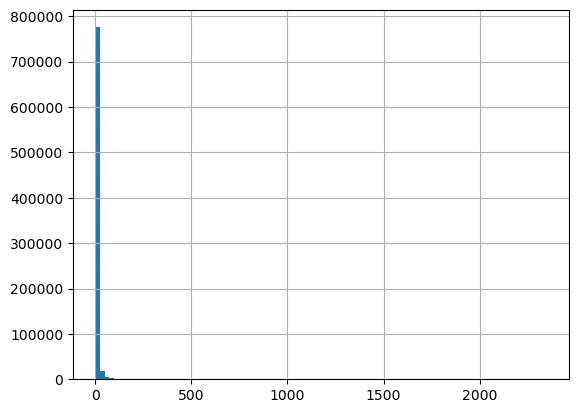

In [56]:
sales['total_quantity'].hist(bins=100)

1) У нас все еще остались минусы, занчит придется вернуться назад и еще пошаманить. 

2) Какие-то мистические выбросы присутствуют... Для начала посмотрим хотя бы больше 200

Разобрался с минусами. Там было одно единственное значение с минусом в штуках. А я до этого удалял только строки с минусами в рублях. 

Теперь перейдем к экстримальным значениям. 

In [57]:
sales['total_quantity'].describe()

count    803352.000000
mean          5.500279
std          13.961299
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        2348.000000
Name: total_quantity, dtype: float64

In [58]:
display(sales[sales['total_quantity']>=200]['pr_sku_id'])

5542      8cad09283d1d6c5fb08daec8a576a72d
6715      7a5ebc8af2689363da125308abe00d7f
9367      0a2090e24b6ae62b0b0fcaa67a72b5a0
10507     62d4af457ba2540ce0898a211c0cd17a
10962     63b837c9a3fd362191761401ed418679
                        ...               
874077    4b083e10f6cd2f4360c5425d05be6386
877814    4b083e10f6cd2f4360c5425d05be6386
878356    4b083e10f6cd2f4360c5425d05be6386
880316    4a15a652bde1a9a3ac9cb96160ff3a98
882406    ced0c1a84924c982a6403870c54b99ca
Name: pr_sku_id, Length: 301, dtype: object

300 штук как бы мало, а как бы и не мало. 

In [59]:
display(sales[sales['total_quantity']>=200]['pr_sku_id'].value_counts())

4b083e10f6cd2f4360c5425d05be6386    71
5af7d2c94cb126b9cd5b485c4a0732fc    25
9aa7008fa27151bf77be5f4c9d023d5f    25
62d4af457ba2540ce0898a211c0cd17a    23
ced0c1a84924c982a6403870c54b99ca    17
5fb6bfa7b7d9a415d5f95d3951e2a35d    15
641e167f974d1dd076c0886d17271975    15
4a15a652bde1a9a3ac9cb96160ff3a98    14
20d9b4bfd4b672f61d87f420856aac5d    13
0a2090e24b6ae62b0b0fcaa67a72b5a0    11
c0e3f3bd815a862433bc3399c487926b     9
54cc81ad9eadc5ccde13e001ddfa3eb1     8
6d6ca571e2a7d2ec70bd9c09aac38f92     6
113bc2e89c4ed2a3fa3091c9adcb3f49     6
7a5ebc8af2689363da125308abe00d7f     5
c4a665596d4f67cecb7542c9fad407ee     4
8cad09283d1d6c5fb08daec8a576a72d     4
998f28b5baa9b34f23eaf2e08ed2d63c     4
0a68dd43c227b0e66d52665d6c3ca8ba     3
67797f1f0f02ec5ccd5e3abd2d4e5b81     3
639a51b38828b98d1f41256fb07bbc39     2
ae6b048b50f11ba5b7b8b68ea0e386cd     2
062aaeb24e661688e2703821f368a258     2
c7b711619071c92bef604c7ad68380dd     2
b749c085963d0f869dce2755f8ba602a     2
7e9c1924405fe6e60600644b9

Есть товары, для которых большие значения - просто выбросы, а есть - для которых норма. Нам важно их разделить и обработать соответствующим образом.

Но в целом, конечно, ничтожное количество этих выбросов. Надо, конечно, что-то с этим делать. 

In [60]:
display(sales.sort_values(by = 'total_quantity', ascending=False).head(30))

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub,total_quantity,total_sum,price
339690,fa7cdfad1a5aaf8370ebeda47a1ff1c3,9aa7008fa27151bf77be5f4c9d023d5f,2023-04-15,1,0.0,2348.0,0.0,62429.0,2348.0,62429.0,26.588160
48731,fa7cdfad1a5aaf8370ebeda47a1ff1c3,9aa7008fa27151bf77be5f4c9d023d5f,2023-04-14,1,0.0,1872.0,0.0,50034.0,1872.0,50034.0,26.727564
647448,6364d3f0f495b6ab9dcf8d3b5c6e0b01,5af7d2c94cb126b9cd5b485c4a0732fc,2023-04-15,1,0.0,1596.0,0.0,70790.0,1596.0,70790.0,44.354637
26051,fa7cdfad1a5aaf8370ebeda47a1ff1c3,5af7d2c94cb126b9cd5b485c4a0732fc,2023-04-15,1,0.0,1400.0,0.0,61861.0,1400.0,61861.0,44.186429
703790,16a5cdae362b8d27a1d8f8c7b78b4330,4b083e10f6cd2f4360c5425d05be6386,2023-03-23,1,0.0,1271.0,0.0,91872.0,1271.0,91872.0,72.283242
628085,16a5cdae362b8d27a1d8f8c7b78b4330,5af7d2c94cb126b9cd5b485c4a0732fc,2023-04-15,1,0.0,1211.0,0.0,53756.0,1211.0,53756.0,44.389761
833897,16a5cdae362b8d27a1d8f8c7b78b4330,9aa7008fa27151bf77be5f4c9d023d5f,2023-04-15,1,0.0,1197.0,0.0,31998.0,1197.0,31998.0,26.731830
210848,6364d3f0f495b6ab9dcf8d3b5c6e0b01,641e167f974d1dd076c0886d17271975,2022-11-04,1,0.0,1185.0,0.0,54687.0,1185.0,54687.0,46.149367
354010,42a0e188f5033bc65bf8d78622277c4e,9aa7008fa27151bf77be5f4c9d023d5f,2023-04-15,1,0.0,1162.0,0.0,31111.0,1162.0,31111.0,26.773666
790855,42a0e188f5033bc65bf8d78622277c4e,9aa7008fa27151bf77be5f4c9d023d5f,2023-04-14,1,0.0,1106.0,0.0,29282.0,1106.0,29282.0,26.475588


Это привет из будущего. Я проверял количества экстремальных выбросов. И их много и огни огромные. Значит, проблема в функции, будем ее ковырять.

## Предложение метода обработки выбросов. 

Проблема: 

Слишком большие выбросы есть и они испортят модель. Удалить выбросы мы не можем, потому что они потом заменятся нулями, а нули только сместят наш прогноз в меньшую сторону, что плохо. 

Предполагаемое решение:
    
Заменить экстремальные выбросы значениями на границе выбросов, чтобы они обозначали высокое значение, но не вызывали черезмерный перекос в моделях/корреляциях. 

Для каждого товара(пока даже без разделения по магазинам/группам магазинов просто для проверки гипотезы...) найти медиану и межквартильный размах. Затем можно у становить трэхолд, например:

if sales[i] > (sales[i].median() + 3*IQR ):
    sales[i] = (sales[i].median() + 3*IQR )
    
Нормальный порог - верхняя граница выбросов. Мне кажется мы избавимся от выбросов и проадекватим наши значения для прогноза. Но тут, конечно, придется проверять, потому что на данный момент результат непредсказуем. 

In [61]:
sku_limits = pd.DataFrame({'sku_id': sales['pr_sku_id'].unique()})

display(sku_limits)

,sku_id
0,c7b711619071c92bef604c7ad68380dd
1,68f441429e73dbd33b81f95da31576e9
2,22988026fe85fde60d8bf777ab6bc3b4
3,e6fc24ca846339d204b0b50e9f772484
4,3474f0e025c7deb7e127a35763bc5512
...,...
1865,57e82787ed765d35b35a286918e7fb71
1866,9ebee10990ab80c27c56b82eb73effba
1867,9931c82bbac0fb0967b5dbc82f9c4a6a
1868,3a0babb7888bd5976ce3df45743615af


In [62]:
medians = []

for sku_id in sku_limits['sku_id']:
    median_value = sales[sales['pr_sku_id'] == sku_id]['total_quantity'].median()
    medians.append(median_value)


sku_limits['medians'] = medians

display(sku_limits)

,sku_id,medians
0,c7b711619071c92bef604c7ad68380dd,8.0
1,68f441429e73dbd33b81f95da31576e9,2.0
2,22988026fe85fde60d8bf777ab6bc3b4,4.0
3,e6fc24ca846339d204b0b50e9f772484,1.0
4,3474f0e025c7deb7e127a35763bc5512,4.0
...,...,...
1865,57e82787ed765d35b35a286918e7fb71,6.0
1866,9ebee10990ab80c27c56b82eb73effba,1.0
1867,9931c82bbac0fb0967b5dbc82f9c4a6a,4.0
1868,3a0babb7888bd5976ce3df45743615af,1.0


In [63]:
iqr_values = []

for sku_id in sku_limits['sku_id']:
    sku_data = sales[sales['pr_sku_id'] == sku_id]['total_quantity']
    q1 = sku_data.quantile(0.25)
    q3 = sku_data.quantile(0.75)
    iqr = q3 - q1
    iqr_values.append(iqr)

sku_limits['iqr'] = iqr_values

display(sku_limits)


,sku_id,medians,iqr
0,c7b711619071c92bef604c7ad68380dd,8.0,13.0
1,68f441429e73dbd33b81f95da31576e9,2.0,2.0
2,22988026fe85fde60d8bf777ab6bc3b4,4.0,6.0
3,e6fc24ca846339d204b0b50e9f772484,1.0,1.0
4,3474f0e025c7deb7e127a35763bc5512,4.0,6.0
...,...,...,...
1865,57e82787ed765d35b35a286918e7fb71,6.0,0.0
1866,9ebee10990ab80c27c56b82eb73effba,1.0,0.0
1867,9931c82bbac0fb0967b5dbc82f9c4a6a,4.0,0.0
1868,3a0babb7888bd5976ce3df45743615af,1.0,0.0


In [64]:
display(sku_limits.sort_values(by = 'iqr', ascending = False).head(30))

,sku_id,medians,iqr
896,5af7d2c94cb126b9cd5b485c4a0732fc,42.5,128.00
1251,9aa7008fa27151bf77be5f4c9d023d5f,27.0,114.00
47,20d9b4bfd4b672f61d87f420856aac5d,33.0,103.00
666,fd55c4022acef4de4c7dc6cdd85a2d7a,31.0,72.00
74,c0e3f3bd815a862433bc3399c487926b,31.0,52.00
1350,6d6ca571e2a7d2ec70bd9c09aac38f92,18.0,50.00
96,4b083e10f6cd2f4360c5425d05be6386,22.0,45.00
232,4695acecbef4734453cf9bc0be67ffe4,9.0,43.00
171,ced0c1a84924c982a6403870c54b99ca,14.0,31.00
23,d5bfeecaaa47887a4b92d17fa55c2e18,14.0,29.75


In [65]:
sku_limits['limit'] = sku_limits['medians'] + 3*sku_limits['iqr']
display(sku_limits.sort_values(by = 'limit', ascending = False).head(10))
#display(sku_limits.sort_values(by = 'limit', ascending = False).tail(10))

,sku_id,medians,iqr,limit
896,5af7d2c94cb126b9cd5b485c4a0732fc,42.5,128.00,426.50
1251,9aa7008fa27151bf77be5f4c9d023d5f,27.0,114.00,369.00
47,20d9b4bfd4b672f61d87f420856aac5d,33.0,103.00,342.00
666,fd55c4022acef4de4c7dc6cdd85a2d7a,31.0,72.00,247.00
74,c0e3f3bd815a862433bc3399c487926b,31.0,52.00,187.00
1350,6d6ca571e2a7d2ec70bd9c09aac38f92,18.0,50.00,168.00
96,4b083e10f6cd2f4360c5425d05be6386,22.0,45.00,157.00
232,4695acecbef4734453cf9bc0be67ffe4,9.0,43.00,138.00
171,ced0c1a84924c982a6403870c54b99ca,14.0,31.00,107.00
23,d5bfeecaaa47887a4b92d17fa55c2e18,14.0,29.75,103.25


Двух тысяч нет и на том спасибо:) 
Теперь важно понимать, что у нас такие выбросы есть только у некоторого количества товаров, так что только к ним давайте это и применим. 
Еще важно остальные данные не покорежить. Итак, какой порог возьмем? 200 или до 100 снизим? 

In [66]:
display(sales[sales['total_quantity']>=100]['pr_sku_id'].value_counts())

62d4af457ba2540ce0898a211c0cd17a    267
20d9b4bfd4b672f61d87f420856aac5d    228
4b083e10f6cd2f4360c5425d05be6386    227
c0e3f3bd815a862433bc3399c487926b    204
ced0c1a84924c982a6403870c54b99ca    192
                                   ... 
861f516882af16ff45234407eda09606      1
a8323a788674a3b1d7095b437f879823      1
ef3242a6f900ede54fb74b71be822e37      1
b2592b47d3a46f07d90c3e5a9cf3acc3      1
8234f64ae86cf8c923d1c814b0ccf49b      1
Name: pr_sku_id, Length: 80, dtype: int64

In [67]:
sales2= sales.copy()

### А вот и квинтэессенция, то, зачем мучился... 

In [68]:
#display(sales2)

In [69]:
display(sku_limits[sku_limits['sku_id'] == '5af7d2c94cb126b9cd5b485c4a0732fc']['limit'].values[0])
display(sku_limits[sku_limits['sku_id'] == '6d6ca571e2a7d2ec70bd9c09aac38f92']['limit'].values[0])

426.5

168.0

In [70]:
limit_value = 100

for pr_sku_id in sales[sales['total_quantity'] >= limit_value]['pr_sku_id'].unique():
    sku_limit = sku_limits[sku_limits['sku_id'] == pr_sku_id]['limit'].values[0]   
    for index, row in sales[sales['pr_sku_id'] == pr_sku_id].iterrows():
        if row['total_quantity'] > sku_limit:
            sales.at[index, 'total_quantity'] = sku_limit

<Axes: >

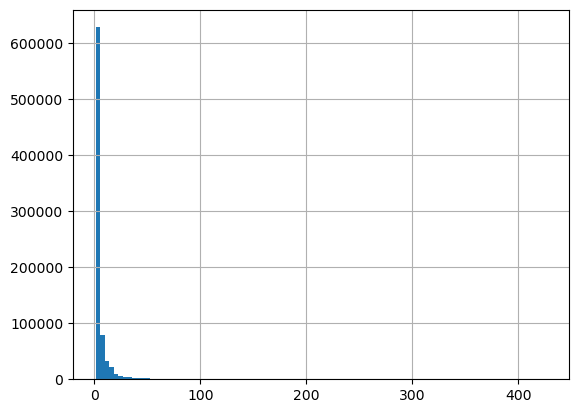

In [71]:
sales['total_quantity'].hist(bins=100)

Альтернативные попытки, похоже, не понадобятся... Пришлось просто поменять последовательность выполнения кода. Индекс в виде Data Series ломал мой код несколько часов... мрак

In [72]:
#limit_value = 100

#mask = sales2['pr_sku_id'].isin(sales2[sales2['total_quantity'] >= limit_value]['pr_sku_id'].unique())
#display(mask.value_counts())

In [73]:
# Merge sku_limits DataFrame to sales2 based on 'sku_id'
#sales2 = sales2.merge(sku_limits, left_on='pr_sku_id', right_on='sku_id', how='left')
#display(sales2)

In [74]:
#display(sales2.dtypes)

In [75]:
#print(sales2.loc[mask])

In [76]:
# Update 'total_quantity' based on conditions
#sales2.loc[mask & (sales2['total_quantity'] > sales2['limit']), 'total_quantity'] = sales2['limit']

In [77]:
# Drop the 'limit' column if you no longer need it
#sales2.drop(columns=['limit'], inplace=True)

# Переоформление во временной ряд

In [78]:
sales['date'] = pd.to_datetime(sales['date'])

In [79]:
display(sales.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803352 entries, 0 to 883014
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   st_id                    803352 non-null  object        
 1   pr_sku_id                803352 non-null  object        
 2   date                     803352 non-null  datetime64[ns]
 3   pr_sales_type_id         803352 non-null  int64         
 4   pr_sales_in_units        803352 non-null  float64       
 5   pr_promo_sales_in_units  803352 non-null  float64       
 6   pr_sales_in_rub          803352 non-null  float64       
 7   pr_promo_sales_in_rub    803352 non-null  float64       
 8   total_quantity           803352 non-null  float64       
 9   total_sum                803352 non-null  float64       
 10  price                    803352 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 89.7+ MB


None

In [80]:
sales.sort_values(by=['date','st_id', 'pr_sku_id'], inplace=True)

In [81]:
#sales.set_index('date', inplace=True)

In [82]:
display(sales)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub,total_quantity,total_sum,price
684963,16a5cdae362b8d27a1d8f8c7b78b4330,00661699f543753ec7e911a64b9fd2f6,2022-08-01,0,1.0,0.0,435.0,0.0,1.0,435.0,435.000000
550849,16a5cdae362b8d27a1d8f8c7b78b4330,0094042bfeae507dc7f62acc8e5ed03a,2022-08-01,1,0.0,2.0,0.0,383.0,2.0,383.0,191.500000
728531,16a5cdae362b8d27a1d8f8c7b78b4330,0094042bfeae507dc7f62acc8e5ed03a,2022-08-01,0,4.0,0.0,712.0,0.0,4.0,712.0,178.000000
834269,16a5cdae362b8d27a1d8f8c7b78b4330,033013f94a18c066e8b3d610bed34bee,2022-08-01,0,4.0,0.0,102.0,0.0,4.0,102.0,25.500000
218614,16a5cdae362b8d27a1d8f8c7b78b4330,050a8120e2a3b8751df8752fcc0323ef,2022-08-01,1,0.0,12.0,0.0,1948.0,12.0,1948.0,162.333333
...,...,...,...,...,...,...,...,...,...,...,...
215471,fa7cdfad1a5aaf8370ebeda47a1ff1c3,f8e67df2dd557f44074271107ab9781a,2023-07-18,1,0.0,3.0,0.0,377.0,3.0,377.0,125.666667
803934,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fbf6c91454d7c3cea7b03f3092cbfb73,2023-07-18,0,1.0,0.0,253.0,0.0,1.0,253.0,253.000000
87328,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fdb89dfd1a27256904eb5a5734252102,2023-07-18,0,4.0,0.0,787.0,0.0,4.0,787.0,196.750000
642164,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fe50ae64d08d4f8245aaabc55d1baf79,2023-07-18,1,0.0,5.0,0.0,716.0,5.0,716.0,143.200000


## Дроп столбцов

In [83]:
columns_to_drop = ['pr_sales_in_units', 'pr_promo_sales_in_units', 'pr_sales_in_rub', 'pr_promo_sales_in_rub' , 'total_sum']

In [84]:
sales = sales.drop(columns_to_drop, axis = 1)

In [85]:
sales['price'] = sales['price'].round(1)

In [86]:
display(sales)

,st_id,pr_sku_id,date,pr_sales_type_id,total_quantity,price
684963,16a5cdae362b8d27a1d8f8c7b78b4330,00661699f543753ec7e911a64b9fd2f6,2022-08-01,0,1.0,435.0
550849,16a5cdae362b8d27a1d8f8c7b78b4330,0094042bfeae507dc7f62acc8e5ed03a,2022-08-01,1,2.0,191.5
728531,16a5cdae362b8d27a1d8f8c7b78b4330,0094042bfeae507dc7f62acc8e5ed03a,2022-08-01,0,4.0,178.0
834269,16a5cdae362b8d27a1d8f8c7b78b4330,033013f94a18c066e8b3d610bed34bee,2022-08-01,0,4.0,25.5
218614,16a5cdae362b8d27a1d8f8c7b78b4330,050a8120e2a3b8751df8752fcc0323ef,2022-08-01,1,12.0,162.3
...,...,...,...,...,...,...
215471,fa7cdfad1a5aaf8370ebeda47a1ff1c3,f8e67df2dd557f44074271107ab9781a,2023-07-18,1,3.0,125.7
803934,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fbf6c91454d7c3cea7b03f3092cbfb73,2023-07-18,0,1.0,253.0
87328,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fdb89dfd1a27256904eb5a5734252102,2023-07-18,0,4.0,196.8
642164,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fe50ae64d08d4f8245aaabc55d1baf79,2023-07-18,1,5.0,143.2


In [87]:
#display(sales.['2023-07-18'])

In [88]:
#filled_df = template_df.merge(df, on=['st_id', 'pr_sku_id'], how='left')
#filled_df.fillna(0, inplace=True)

# Создание пустых строк в Data Series

In [89]:
start_date = '2022-08-01'
end_date = '2023-07-18'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

In [90]:
dates_df = pd.DataFrame({'date': date_range})
#display(dates_df)

In [91]:
valid_combinations = sales[['st_id', 'pr_sku_id']].drop_duplicates()
#display(valid_combinations)

In [106]:
result_df = dates_df.merge(valid_combinations, how='cross')
new_order = ['st_id', 'pr_sku_id', 'date']
result_df = result_df[new_order]
display(result_df)

,st_id,pr_sku_id,date
0,16a5cdae362b8d27a1d8f8c7b78b4330,00661699f543753ec7e911a64b9fd2f6,2022-08-01
1,16a5cdae362b8d27a1d8f8c7b78b4330,0094042bfeae507dc7f62acc8e5ed03a,2022-08-01
2,16a5cdae362b8d27a1d8f8c7b78b4330,033013f94a18c066e8b3d610bed34bee,2022-08-01
3,16a5cdae362b8d27a1d8f8c7b78b4330,050a8120e2a3b8751df8752fcc0323ef,2022-08-01
4,16a5cdae362b8d27a1d8f8c7b78b4330,06076bf3c802444ebc7d5619ab64ceb6,2022-08-01
...,...,...,...
2085595,c81e728d9d4c2f636f067f89cc14862c,8878e97692da06941dedcf44c1f50668,2023-07-18
2085596,fa7cdfad1a5aaf8370ebeda47a1ff1c3,2ef03c58e3783eb11acba9d15909f6fe,2023-07-18
2085597,f7e6c85504ce6e82442c770f7c8606f0,01e4734745e97e52d3213449e1a05dd7,2023-07-18
2085598,c81e728d9d4c2f636f067f89cc14862c,a6bb0069cab63ea1d8d050a315c51154,2023-07-18


In [93]:
display(result_df['date'].value_counts())

2022-08-01    5925
2022-08-02    5925
2023-03-29    5925
2023-03-28    5925
2023-03-27    5925
              ... 
2022-11-24    5925
2022-11-23    5925
2022-11-22    5925
2022-11-21    5925
2023-07-18    5925
Name: date, Length: 352, dtype: int64

In [94]:
#result_df.set_index(['date'], inplace=True)

In [109]:
display(sales['date'].value_counts())

2022-12-30    3176
2022-12-29    3065
2022-12-24    2969
2022-12-28    2837
2023-06-23    2806
              ... 
2023-01-23    1844
2023-04-17    1836
2023-01-09    1825
2023-01-02    1771
2023-01-01    1046
Name: date, Length: 352, dtype: int64

In [96]:
display(sales)

,st_id,pr_sku_id,date,pr_sales_type_id,total_quantity,price
684963,16a5cdae362b8d27a1d8f8c7b78b4330,00661699f543753ec7e911a64b9fd2f6,2022-08-01,0,1.0,435.0
550849,16a5cdae362b8d27a1d8f8c7b78b4330,0094042bfeae507dc7f62acc8e5ed03a,2022-08-01,1,2.0,191.5
728531,16a5cdae362b8d27a1d8f8c7b78b4330,0094042bfeae507dc7f62acc8e5ed03a,2022-08-01,0,4.0,178.0
834269,16a5cdae362b8d27a1d8f8c7b78b4330,033013f94a18c066e8b3d610bed34bee,2022-08-01,0,4.0,25.5
218614,16a5cdae362b8d27a1d8f8c7b78b4330,050a8120e2a3b8751df8752fcc0323ef,2022-08-01,1,12.0,162.3
...,...,...,...,...,...,...
215471,fa7cdfad1a5aaf8370ebeda47a1ff1c3,f8e67df2dd557f44074271107ab9781a,2023-07-18,1,3.0,125.7
803934,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fbf6c91454d7c3cea7b03f3092cbfb73,2023-07-18,0,1.0,253.0
87328,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fdb89dfd1a27256904eb5a5734252102,2023-07-18,0,4.0,196.8
642164,fa7cdfad1a5aaf8370ebeda47a1ff1c3,fe50ae64d08d4f8245aaabc55d1baf79,2023-07-18,1,5.0,143.2


In [105]:
filled_df = result_df.merge(sales, on=['st_id', 'pr_sku_id', 'date'], how='left')
display(filled_df)

,st_id,pr_sku_id,date,pr_sales_type_id,total_quantity,price
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1.0,5.0,165.0
1,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,0.0,18.0,177.9
2,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0.0,4.0,49.0
3,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0.0,1.0,78.0
4,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,1.0,2.0,49.0
...,...,...,...,...,...,...
2483885,fa7cdfad1a5aaf8370ebeda47a1ff1c3,2ef03c58e3783eb11acba9d15909f6fe,2023-07-18,NaN,NaN,NaN
2483886,f7e6c85504ce6e82442c770f7c8606f0,01e4734745e97e52d3213449e1a05dd7,2023-07-18,0.0,25.0,67.3
2483887,f7e6c85504ce6e82442c770f7c8606f0,01e4734745e97e52d3213449e1a05dd7,2023-07-18,1.0,2.0,57.0
2483888,c81e728d9d4c2f636f067f89cc14862c,a6bb0069cab63ea1d8d050a315c51154,2023-07-18,0.0,1.0,98.0


In [108]:
display(filled_df['date'].value_counts())

2022-12-30    11834
2022-12-29    11453
2022-12-31    11019
2022-12-28    10709
2023-03-04    10625
              ...  
2022-12-07     3100
2022-12-06     3085
2022-08-22     3078
2022-11-28     3070
2022-12-05     2976
Name: date, Length: 352, dtype: int64

In [101]:
# Update 'result_df' with columns from 'sales'
#result_df.update(sales[['pr_sales_type_id', 'total_quantity', 'price']])
#result_df.update(sales)


In [ ]:
# Fill missing values with zeros
#result_df.fillna(0, inplace=True)
#result_df.index = pd.to_datetime(result_df.index)

In [102]:
display(result_df)

,st_id,pr_sku_id,date
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02
3,16a5cdae362b8d27a1d8f8c7b78b4330,050a8120e2a3b8751df8752fcc0323ef,2022-08-01
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17
...,...,...,...
2085595,c81e728d9d4c2f636f067f89cc14862c,8878e97692da06941dedcf44c1f50668,2023-07-18
2085596,fa7cdfad1a5aaf8370ebeda47a1ff1c3,2ef03c58e3783eb11acba9d15909f6fe,2023-07-18
2085597,f7e6c85504ce6e82442c770f7c8606f0,01e4734745e97e52d3213449e1a05dd7,2023-07-18
2085598,c81e728d9d4c2f636f067f89cc14862c,a6bb0069cab63ea1d8d050a315c51154,2023-07-18


In [ ]:
display(filled_df['date'].value_counts())

In [ ]:
#unique_st_ids = sales['st_id'].unique()
#unique_pr_sku_ids = sales['pr_sku_id'].unique()
#template_df = pd.DataFrame(
#    [(st_id, pr_sku_id) for st_id in unique_st_ids for pr_sku_id in unique_pr_sku_ids],
#    columns=['st_id', 'pr_sku_id'])

# Merging

In [ ]:
display(store)

In [ ]:
merged_df = pd.merge(sales, store, on='st_id', how='left')

In [ ]:
display(merged_df)